In [1]:
import pyemma 
import pyemma.coordinates as coor
import numpy as np
import h5py as h5
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyemma.util.discrete_trajectories as dt

In [2]:
raw_data = coor.load('data/dis_Phe_His_full.h5')
data_concatenate = np.concatenate(coor.load('data/dis_Phe_His_full.h5'))

getting output of H5Reader:   0%|                      | 0/9891 [00:00<?, ?it/s]

getting output of H5Reader:   0%|                      | 0/9891 [00:00<?, ?it/s]

In [3]:
MSM = pyemma.load('MSM/pyemma/msm_enspara_tprobs.pyemma')
dtrajs = coor.load('clustering/2nd_clustering/final_dtraj.h5')
dt2 = [i.astype(np.int_) for i in dtrajs]
dt3 = [i.reshape((i.shape[0])) for i in dt2]
dtrajs_concatenate = np.concatenate(dt3)

getting output of H5Reader:   0%|                      | 0/9891 [00:00<?, ?it/s]

In [4]:
cl_sets = np.load('pathways_clusters.npy', allow_pickle = True)
cluster_indexes = np.array(np.load('clustering/2nd_clustering/final_cluster_indexes.pickle', allow_pickle = True))

/home/ella/anaconda3/envs/msmpy37/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [6]:
frame_in_cl_w = []
for i, vl in enumerate(cluster_indexes):
    frame_in_cl_w.append(MSM.pi[i]/len(vl))
frame_in_cl_w = np.array(frame_in_cl_w)
frame_in_cl_w.shape

(2500,)

In [7]:
trajectory_weights = []
for j, traj in enumerate(dt3):
    trajectory_weights.append(frame_in_cl_w[traj])
trajectory_weights= np.array(trajectory_weights)

/home/ella/anaconda3/envs/msmpy37/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [8]:
def extract_traj(indexes, data):
    x = []
    for i, vl in enumerate(indexes):
        x.append(data[vl[0]][vl[1]])
    x = np.array(x)
    return x

In [10]:
n_samples = 300
samples = dt.sample_indexes_by_state(cluster_indexes, nsample = 300)
points = []
smpl_sets = []
for k, sts in enumerate(cl_sets):
    ind = np.concatenate(samples[sts])
    smpl_sets.append(ind[::int(len(ind)/n_samples)])
    points.append(extract_traj(ind, raw_data))
points = np.array(points)
smpl_sets = np.array(smpl_sets)

/home/ella/anaconda3/envs/msmpy37/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == "__main__":


/home/ella/anaconda3/envs/msmpy37/lib/python3.7/site-packages/pyemma/plots/plots2d.py:253: UserWarning: fontsize=45 is not an allowed optional parameter and will be ignored
  ' be ignored'.format(key, kwargs[key]))


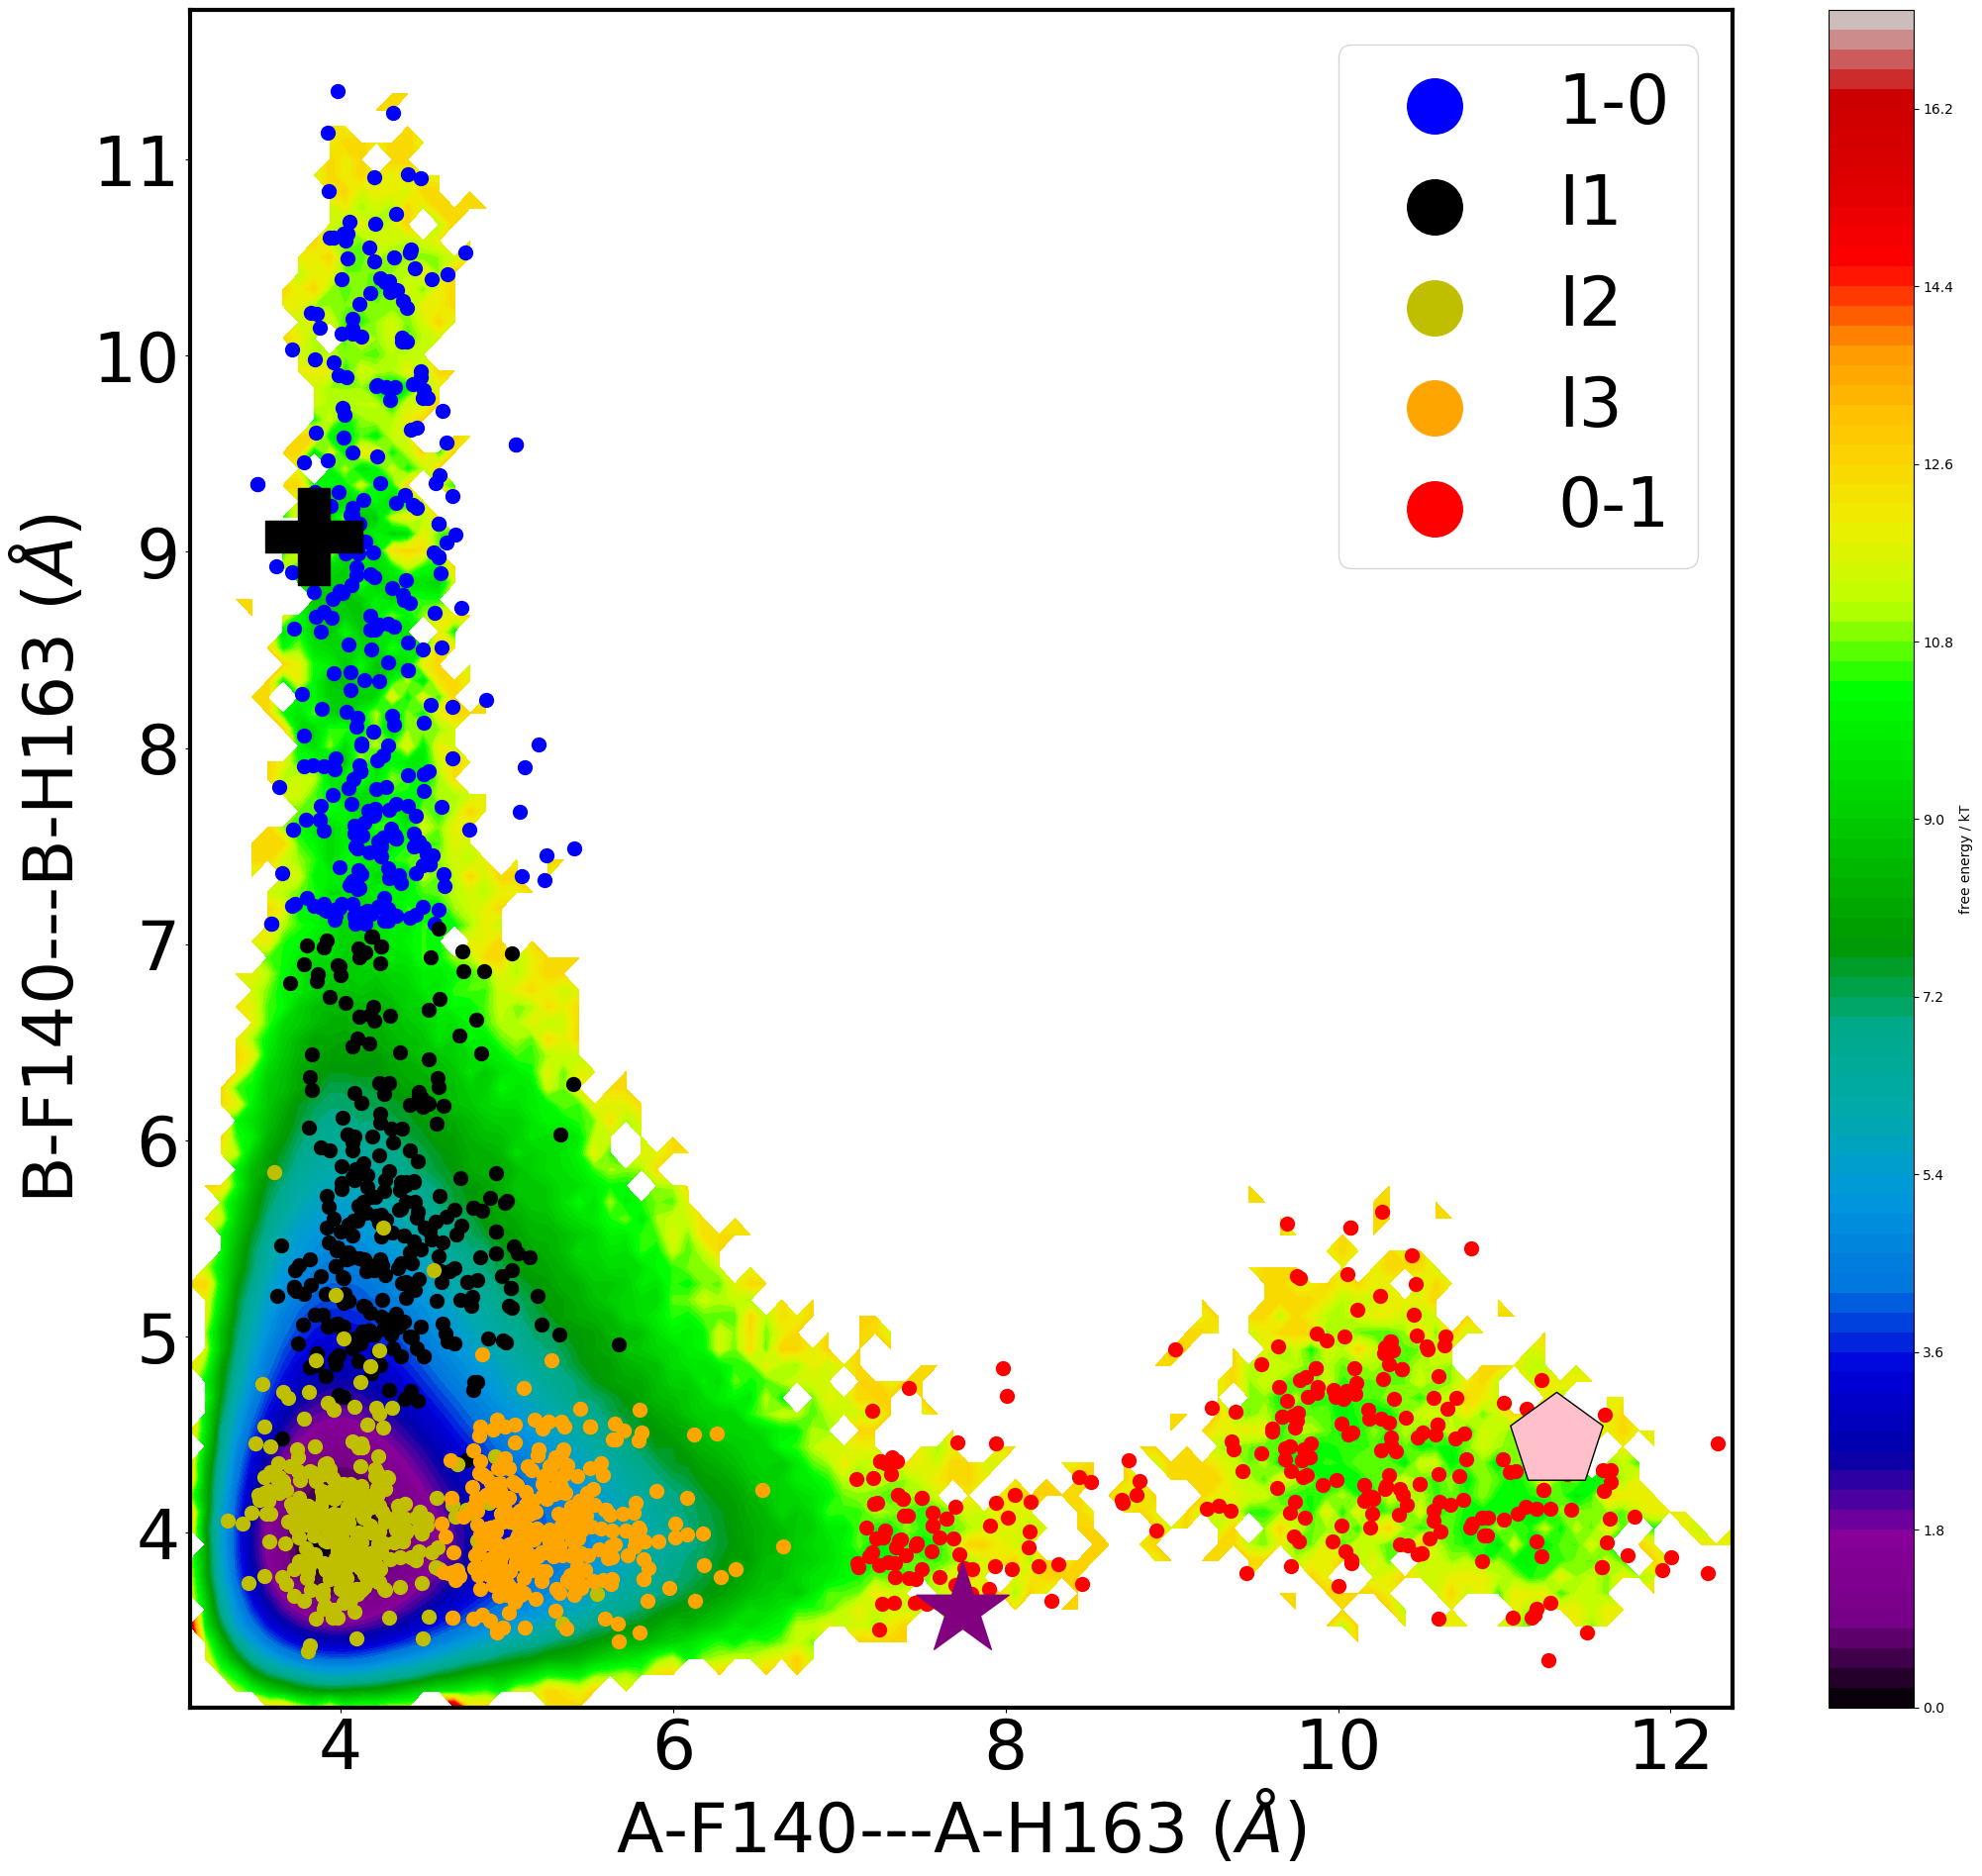

In [12]:
f_pink = extract_traj([np.concatenate(cluster_indexes[np.arange(2490, 2500)])[1007]], raw_data)
f_purple = extract_traj([np.concatenate(cluster_indexes[np.arange(2490, 2500)])[1195]], raw_data)
f_black = extract_traj([np.concatenate(cluster_indexes[np.arange(2480, 2490)])[1495]], raw_data)
cm = 1/2.54
fig, ax = plt.subplots(figsize=(8.5/cm, 7.5/cm))
ft = 50
__, __, misc = pyemma.plots.plot_free_energy(
    *data_concatenate.T,
    weights=np.concatenate(trajectory_weights),
    ax=ax, 
    legacy=False, fontsize=45)
p_size = 100
rep_size = 5000
ax.scatter(*points[0][::int(len(points[0])/n_samples)].T, s=p_size, c='blue', label = '1-0')
ax.scatter(*points[2].T, s=p_size, c='black', label = 'I1')
ax.scatter(*points[12][::int(len(points[12])/n_samples)].T, s=p_size, c='y', label = 'I2')
ax.scatter(*points[6].T, s=p_size, c='orange', label = 'I3')
ax.scatter(*points[13][::int(len(points[13])/n_samples)].T, s=p_size, c='r', label = '0-1')
ax.scatter(*f_pink.T, s=rep_size, c='pink', marker='p', edgecolors='black')
ax.scatter(*f_purple.T, s=rep_size, c='purple', marker='*')
ax.scatter(*f_black.T, s=rep_size, c='black', marker='P')
ax.tick_params(axis='both', which='major', labelsize=ft)
ax.set_xlabel(r'A-F140---A-H163 ($\AA$)', fontsize = ft)
ax.set_ylabel(r'B-F140---B-H163 ($\AA$)', fontsize = ft)
ax.legend(loc = 'upper right', markerscale=4., scatterpoints=1, fontsize=ft)
# The spines
plt.setp(ax.spines.values(), linewidth=3)
fig.tight_layout()
# fig.savefig('ACS figures/projection_states.png', bbox_inches ="tight", pad_inches = 0.2, transparent = True, facecolor ="w",
#                              edgecolor ='w', orientation ='landscape')